# Maggi Ban Case Sentiment Analysis Project

### Downloading twitter data

In [ ]:
import got3 as got
import csv
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('nestlemaggi OR magginoodles OR maggiban OR merimaggi OR maggieban OR magiban OR 2minutesmaggi OR attamaggi OR chickenmaggi').setSince("2015-06-05").setUntil("2015-11-09").setMaxTweets(100000)
 
csvFile = open('Maggi_TwitterData.csv', 'a')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["Date", "Geo", "Retweets", "Mentions", "Tweet"])
tweet = got.manager.TweetManager.getTweets(tweetCriteria)
for each in tweet:
    #print each.text
    #print each.date
    #print "geo::: ",each.geo
    csvWriter.writerow([each.date, each.geo, each.retweets, each.mentions, each.text.encode('utf-8').strip()]) #.encode('utf-8').strip()
    #csvWriter.writerow([each])
    #print each.
csvFile.close()

### ### Importing Data

In [ ]:
import pandas as pd
import numpy as np

In [4]:
MaggiBan = pd.read_csv("E:\\Big Data\\Project\\Maggi Ban Case Analysis\\Maggi_TwitterData.csv",encoding='ISO-8859-1')

In [5]:
MaggiBan.head()

,Date,Retweets,Mentions,Tweet,Unnamed: 4
0,10-11-2015 05:17,0,NaN,#merimaggi https:// instagram.com/p/94g_mWmKF7/,NaN
1,10-11-2015 05:13,1,NaN,The Yellow packets are back.. Guys ready for y...,NaN
2,10-11-2015 05:13,0,NaN,The Yellow packets are back.. Guys ready for y...,NaN
3,10-11-2015 04:57,0,@MaggiIndia @snapdeal,@MaggiIndia Registered for the Flash Sale from...,NaN
4,10-11-2015 04:13,0,@harveensachdeva,@harveensachdeva Thank you. Itâs good to be ...,NaN


In [6]:
MaggiBan = MaggiBan.drop(["Mentions","Unnamed: 4"],axis=1)

### Data Preprocessing

In [7]:
import re

In [8]:
def clean_Tweet(DatasetName,InputColumn,OutputColumn):
    DatasetName[OutputColumn]=""
    for i in range(1001):
            DatasetName[OutputColumn][i] = re.sub("(RT:) [\w_]+", " ", InputColumn[i]) #Removing RT:
            DatasetName[OutputColumn][i] = re.sub(r'(?:@[\w_]+)','',DatasetName[OutputColumn][i]) #Removing @
            DatasetName[OutputColumn][i] = re.sub("(f|ht)(tp)(s?)(://)(.*)[.|/](.*)", " ",  DatasetName[OutputColumn][i]) #removing Https
            DatasetName[OutputColumn][i] = re.sub("#", " ",  DatasetName[OutputColumn][i]) #Removing Hashtags
            DatasetName[OutputColumn][i] = re.sub("â+\x80¦", " ",  DatasetName[OutputColumn][i]) #Removing Unidentified characters
            DatasetName[OutputColumn][i] = re.sub("(pic.twitter.com/)[\w]+", " ",  DatasetName[OutputColumn][i]) #Removing web links
            DatasetName[OutputColumn][i] = re.sub(r'[^\w\s]','',DatasetName[OutputColumn][i]) # Removing punctuations
            DatasetName[OutputColumn][i] = re.sub("[ \t]{2,}", " ", DatasetName[OutputColumn][i]) #Removing Tabs
            DatasetName[OutputColumn][i] = re.sub("^\\s+|\\s+$", "", DatasetName[OutputColumn][i]) # Removing Spaces

In [9]:
clean_Tweet(MaggiBan,MaggiBan.Tweet,"CleanedTweet")

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

### Removing stopwords, stemming and tokenizing

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [11]:
words = []
stop = set(stopwords.words('english'))
for i in range(1001):
    sentence = MaggiBan.CleanedTweet[i]
    words += [porter.stem(w) for w in sentence.lower().split() if w not in stop and len(w) >= 3]

### Find Frequency of tokenize words

In [12]:
Freq = nltk.FreqDist(words)

In [13]:
NewDataFrame =  pd.DataFrame(list(Freq.items()), columns=['Word', 'Frequency'])

In [14]:
SortedDataFrame = NewDataFrame.sort_values(by="Frequency",ascending=False)

In [15]:
SortedDataFrame.head(50)

,Word,Frequency
614,maggi,465
630,back,364
446,thank,168
752,love,142
611,noodl,122
244,diwali,105
185,good,79
651,welcomebackmaggi,77
54,maggiisback,72
734,welcom,71


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

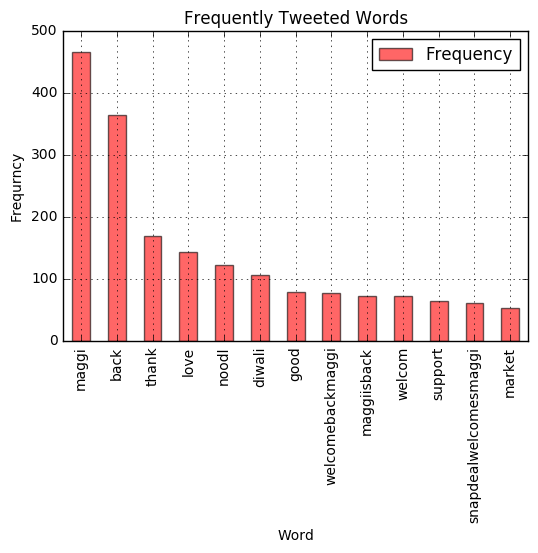

In [18]:
fig = plt.figure(figsize=(25, 15))
alpha = 0.6
SortedDataFrame[SortedDataFrame.Frequency>50].plot.bar(x='Word',y='Frequency',alpha=alpha, color="red")
plt.ylabel('Frequrncy')
plt.title("Frequently Tweeted Words")
plt.grid()
plt.savefig("E:\\Big Data\\Project\\Maggi Ban Case Analysis\\Frequency_Vishal.jpg")

### Creating Wordcloud

In [19]:
generate_string = ""
for i in MaggiBan.CleanedTweet:
    generate_string += i

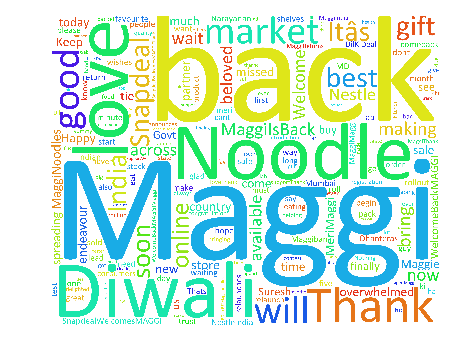

In [20]:
from wordcloud import WordCloud, STOPWORDS

#Convert all the required text into a single string here 
#and store them in word_string
wordcloud = WordCloud(font_path='C:\Windows\Fonts\Calibri.ttf',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=10000,
                          height=8000
                         ).generate(generate_string)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Sentiment Analysis

In [ ]:
from nltk.corpus import sentiwordnet as SWN
from textblob import TextBlob

In [67]:
def get_Sentiment(SentimentValue):
    if SentimentValue>0:
        return 'Positive'
    elif SentimentValue == 0:
        return 'Netural'
    else:
        return 'Negative'

In [65]:
sentiments = {}
MaggiBan["Sentiment"] = ''
MaggiBan["Polarity"] = 0
MaggiBan["Subjectivity"] = 0

In [ ]:
for i in range(MaggiBan.CleanedTweet.count()):
    analysis = TextBlob(MaggiBan.CleanedTweet[i])
    MaggiBan["Polarity"][i] = analysis.sentiment[0]
    MaggiBan["Subjectivity"][i] = analysis.sentiment[1]
    MaggiBan["Sentiment"][i] = get_Sentiment(analysis.sentiment[0])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
MaggiBan["Sentiment"].value_counts().plot.pie()